# **Jobsheet 2: Ekstraksi Fitur**

## **Laporan Praktikum Mata Kuliah Machine Learning oleh:**

### Hanifah Amany

### TI-3E/16

# **Praktikum 1**

**Langkah 1: Persiapan Data**

Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

**Langkah 2: Import Library**

In [ ]:
# import package
import numpy as np
import pandas as pd

**Langkah 3: Baca Data**

In [ ]:
# baca data dari file CSV
data = pd.read_csv('dataset.csv')

**Langkah 4: Pemahaman Terhadap Data**

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Langkah 5: Visualisasi Data**

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Import librari Matplotlib dan Seaborn untuk visualisasi data.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


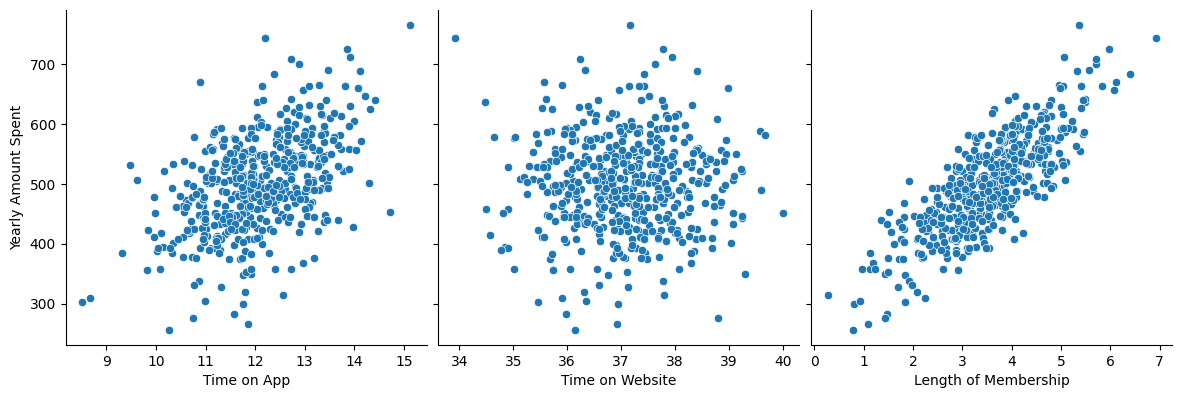

In [ ]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

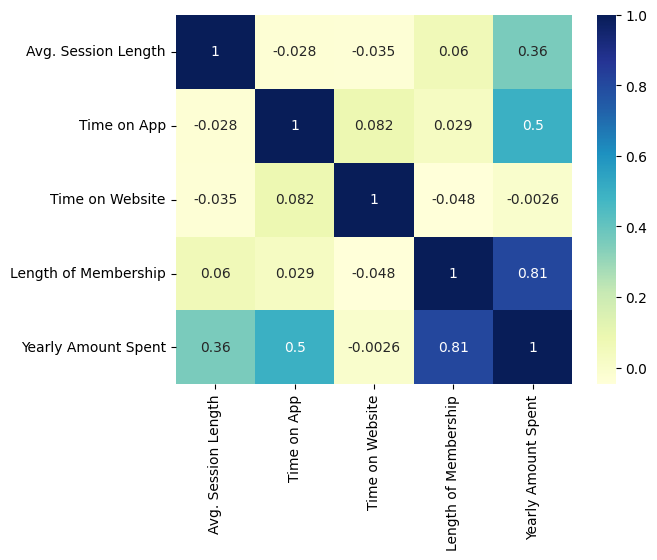

In [ ]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.select_dtypes(include=['number']).corr(), cmap="YlGnBu", annot=True) # Only include numeric columns for correlation calculation.
plt.show()

Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin tinggi nilainya, semakin tinggi korelasinya.

**Langkah 6: Regresi Linier**

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

Pisahkan variabel bebas (X) dan variabel target (Y)

In [ ]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan trai_test_split.

Lakukan training model regresi linier menngunakan library StratsModels. Tambahkan konstanta (intercept) ke variable bebas.

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

Visualisasikan garis regresi pada data latih.

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

**Langkah 7: Analisis Residual**

In [ ]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi)

<ipython-input-26-d336bf8b039e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


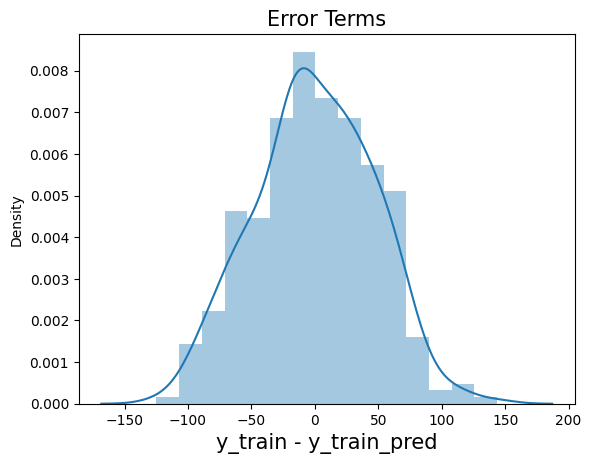

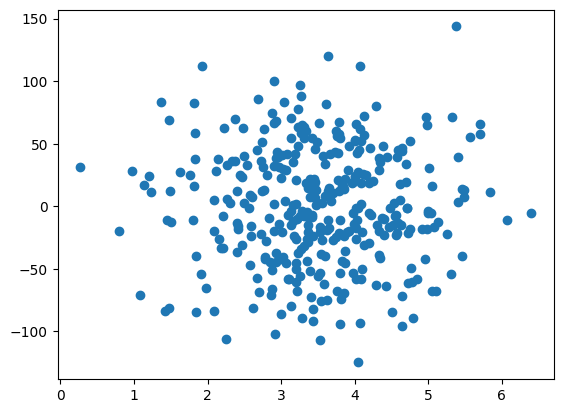

In [ ]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi danpola error.

**Langkah 8: Prediksi pada Data Uji dan Evaluasi Model.**

In [ ]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

Lakukan prediksi pada data uji.

In [ ]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Hitung nilai R-squared untuk mengukur kinerja model pada data uji.

**Langkah 9: Visualisasi Hasil**

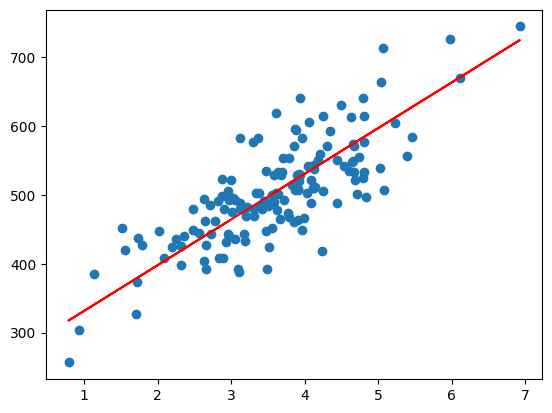

In [ ]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Visualisasikan datauji dan hasil prediksi dalam bnetuk scatter plot.

# **Praktikum 2**

SVR

**Langakah 1: Mengimpor Library**

Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Langkah 2: Mengimpor Dataseet**

*   Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.

*   Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

**Langkah 3: Feature Scaling**

Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

**Langkah 4: Fitting SVR ke Dataset**

Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

**Langkah 5: Visualisasi Hasil SVR**

langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

<ipython-input-51-16b49e598bbf>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


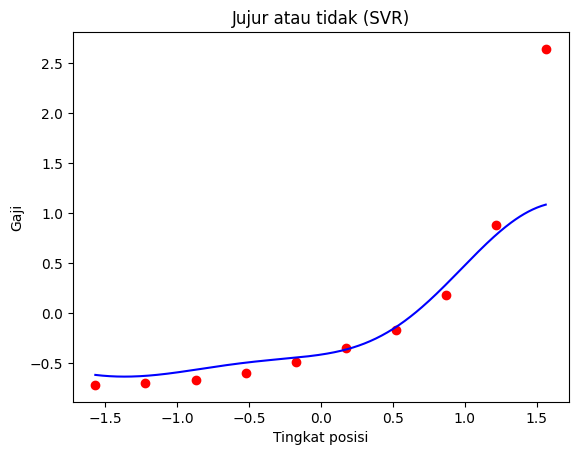

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

**Lankah 6: Prediksi Hasil**

*   Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.

*   Menskalakan fitur prediksi menggunakan sc_X.transform.

*   Melakukan prediksi menggunakan model SVR yang telah dilatih.

*   Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

**Langkah 7: Menampilkan Hasil**

Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode



In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


**Langkah 8: Validasi Hasil**

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


Hasil output Gambar 3.10 adalah grafik dari model Support Vector Regression (SVR) yang telah dilatih untuk memprediksi gaji berdasarkan tingkat posisi. Grafik tersebut merupakan visualisasi dari hubungan antara tingkat posisi (x-axis) dan gaji (y-axis) setelah menerapkan model SVR.

**Gravik SVR:**

*   Pada grafik tersebut, titik-titik merah mewakili data pengamatan asli yang digunakan untuk melatih model.

*   Garis biru adalah hasil dari prediksi model SVR. Garis ini mencoba untuk mengikuti pola data asli sebaik mungkin dan merupakan representasi dari hubungan non-linear antara tingkat posisi dan gaji.

Hasil prediksi yang ditampilkan adalah prediksi gaji untuk tingkat posisi 6.5. Hasilnya adalah sekitar 170,370.02.
Ini berarti model SVR memperkirakan bahwa seseorang dengan tingkat posisi 6.5 akan memiliki gaji sekitar 170,370.02 berdasarkan pola hubungan yang ditemukan dalam data latihan.

Grafik ini memvisualisasikan bagaimana model SVR mencoba untuk menyesuaikan diri dengan data yang ada dan memberikan prediksi yang sesuai berdasarkan tingkat posisi yang diberikan (6.5 dalam hal ini). Dalam prakteknya, Anda dapat menggunakan model ini untuk membuat prediksi gaji berdasarkan tingkat posisi lainnya dengan mengganti nilai tingkat_posisi_prediksi.

**Langkah 9: Evaluasi Model SVR**

Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared



Output

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# **Tugas Praktikum**

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets.

**Instruksi Umum:**

1.   Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2.   Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.


**Tugas 1: Multiple Linear Regression**

1.   Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [ ]:
# import package
import numpy as np
import pandas as pd

# read the data
data = pd.read_csv('insurance.csv')

# display the first few rows of the dataset
data.head(10)

,Unnamed: 0.1,Unnamed: 0,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,1,1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,2,2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,3,3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,4,4,32,1,28.880,0,0,3866.85520,False,True,False,False
5,5,5,31,0,25.740,0,0,3756.62160,False,False,True,False
6,6,6,46,0,33.440,1,0,8240.58960,False,False,True,False
7,7,7,37,0,27.740,3,0,7281.50560,False,True,False,False
8,8,8,37,1,29.830,2,0,6406.41070,True,False,False,False
9,9,9,60,0,25.840,0,0,28923.13692,False,True,False,False


In [ ]:
# checking the size of the data
data.shape

# information about the data
data.info()

# data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1338 non-null   int64  
 1   Unnamed: 0        1338 non-null   int64  
 2   age               1338 non-null   int64  
 3   sex               1338 non-null   int64  
 4   bmi               1338 non-null   float64
 5   children          1338 non-null   int64  
 6   smoker            1338 non-null   int64  
 7   charges           1338 non-null   float64
 8   region_northeast  1338 non-null   bool   
 9   region_northwest  1338 non-null   bool   
 10  region_southeast  1338 non-null   bool   
 11  region_southwest  1338 non-null   bool   
dtypes: bool(4), float64(2), int64(6)
memory usage: 89.0 KB


,Unnamed: 0.1,Unnamed: 0,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,668.500000,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,386.391641,386.391641,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,0.000000,0.000000,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,334.250000,334.250000,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,668.500000,668.500000,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,1002.750000,1002.750000,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,1337.000000,1337.000000,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


**Jawab:**

Berdasarkan analisis di atas, variabel bebas terdiri dari:

* Age (umur): Umur individu yang melakukan asuransi dapat mempengaruhi biaya yang dikeluarkan. Semakin tua individu, semakin tinggi pula biaya yang mungkin dikeluarkan.
* BMI (Indeks Massa Tubuh): BMI menggambarkan proporsi berat badan terhadap tinggi badan. BMI yang tinggi dapat meningkatkan risiko masalah kesehatan tertentu, yang pada gilirannya dapat mempengaruhi biaya medis.
* Sex (jenis kelamin): Jenis kelamin individu juga mempengaruhi biaya kesehatan atau asuransi yang harus dibayarkan. Contohnya, perempuan mungkin membutuhkan asuransi tambahan terkait persalinan.
* Smoker (perokok): Kebiasaan merokok meningkatkan risiko kesehatan, yang dapat menyebabkan biaya perawatan kesehatan yang lebih tinggi.
* Region (wilayah): Lokasi geografis individu dapat mempengaruhi biaya medis. Biaya kesehatan bisa berbeda antara wilayah perkotaan dan pedesaan, serta antar negara bagian atau negara.
* Children (jumlah anak): Jumlah anak yang dimiliki individu dapat mempengaruhi jumlah asuransi yang harus dibayarkan.

Sedangkan variabel targetnya adalah:
* Charges (biaya medis): Variabel ini mencakup jumlah biaya medis yang dikeluarkan oleh individu atau keluarganya.

2.   Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan variabel-variabel bebas (fitur) dan variabel target (biaya)
X = data.drop('charges', axis=1)  # Variabel bebas
y = data['charges']               # Variabel target

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*  X adalah variabel bebas (fitur) dalam dataset, sementara **y** adalah variabel target (biaya medis).

*  Fungsi **`train_test_split`** digunakan untuk membagi dataset menjadi dua bagian: data latih dan data uji.

*  Parameter **`test_size=0.2`** berarti 20% dari dataset akan digunakan sebagai data uji, sedangkan 80% sisanya digunakan untuk melatih model.

*  Parameter **`random_state=42`** memastikan bahwa setiap kali kode dijalankan, pembagian data akan konsisten, menghasilkan set data latih dan uji yang sama.


In [ ]:
print("Dimensi data latih (X_train):", X_train.shape)
print("Dimensi data uji (X_test):", X_test.shape)
print("Dimensi variabel target latih (y_train):", y_train.shape)
print("Dimensi variabel target uji (y_test):", y_test.shape)

Dimensi data latih (X_train): (1070, 11)
Dimensi data uji (X_test): (268, 11)
Dimensi variabel target latih (y_train): (1070,)
Dimensi variabel target uji (y_test): (268,)


In [ ]:
print("Sampel data latih:")
print(X_train.head())  # Menampilkan beberapa baris pertama dari data latih

print("\nSampel data uji:")
print(X_test.head())  # Menampilkan beberapa baris pertama dari data uji

Sampel data latih:
      Unnamed: 0.1  Unnamed: 0  age  sex    bmi  children  smoker  \
560            560         560   46    0  19.95         2       0   
1285          1285        1285   47    0  24.32         0       0   
1142          1142        1142   52    0  24.86         0       0   
969            969         969   39    0  34.32         5       0   
486            486         486   54    0  21.47         3       0   

      region_northeast  region_northwest  region_southeast  region_southwest  
560              False              True             False             False  
1285              True             False             False             False  
1142             False             False              True             False  
969              False             False              True             False  
486              False              True             False             False  

Sampel data uji:
      Unnamed: 0.1  Unnamed: 0  age  sex     bmi  children  smoker  \
764 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pisahkan variabel target (charges) dan variabel bebas (fitur)
X = data[['age', 'bmi', 'children']]  # Kolom fitur
y = data['charges']  # Kolom target

#membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# menampilkan jumlah baris dalam setiap subset
print("Jumlah data latih: ", len(X_train))
print("Jumlah data uji: ", len(X_test))

Jumlah data latih:  936
Jumlah data uji:  402


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


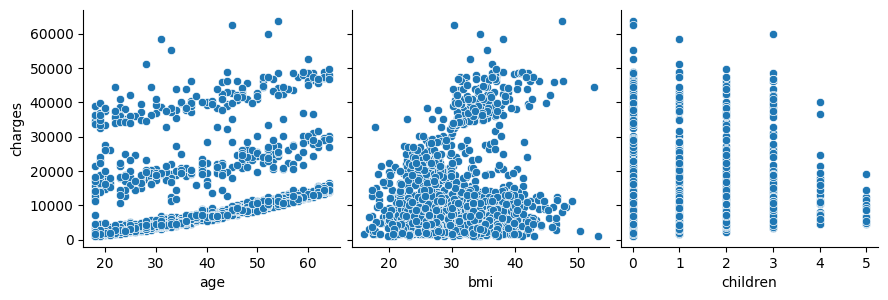

In [ ]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'children'], y_vars='charges', size=3, aspect=1, kind='scatter')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

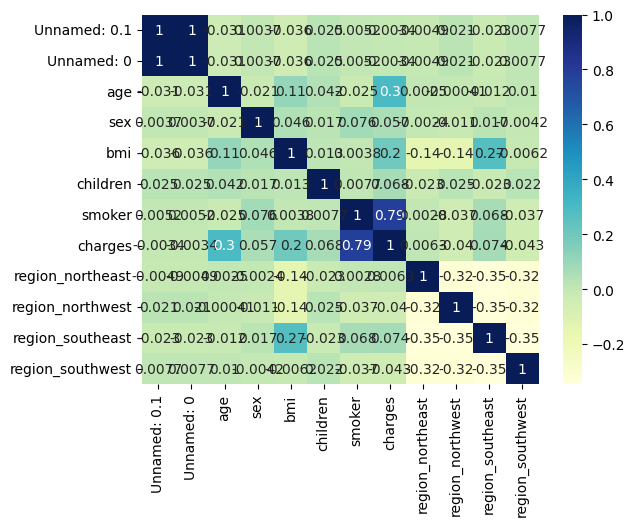

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

3.   Lakukan feature scaling jika diperlukan.

Sebelum melakukan scaling, perlu dilakukan encoding terlebih dahulu. Proses encoding bertujuan untuk mengubah data non-numerik menjadi bentuk numerik, karena model pembelajaran mesin hanya dapat bekerja dengan data numerik. Beberapa variabel yang perlu di-encode adalah:

* Sex (jenis kelamin): Perlu diubah menjadi nilai numerik, misalnya `0` untuk perempuan dan `1` untuk laki-laki.
* Smoker (perokok): Perlu diubah menjadi nilai numerik, misalnya `0` untuk tidak merokok dan `1` untuk merokok.
* Region (wilayah): Karena ini adalah variabel kategori dengan beberapa nilai unik, bisa diubah menjadi numerik menggunakan metode seperti one-hot encoding atau label encoding.

Setelah semua variabel non-numerik diubah menjadi numerik melalui proses encoding, barulah tahap scaling dapat dilakukan untuk memastikan semua fitur berada dalam rentang yang sama, seperti pada pemodelan dengan Support Vector Machines (SVM) yang sensitif terhadap skala data.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
data.to_csv('insurance.csv')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.   Buat model multiple linear regression menggunakan Scikit-Learn.


In [ ]:
from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
from sklearn.svm import SVR
support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)
support_vector_reg.fit(x_train, y_train)

SVR(C=1000, gamma='auto', kernel='linear')

5.   Latih model pada data latih dan lakukan prediksi pada data uji.


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menambahkan kolom konstanta pada fitur data latih
X_train_sm = sm.add_constant(X_train)

# Melatih model dengan OLS
lr = sm.OLS(y_train, X_train_sm).fit()

# Menambahkan kolom konstanta pada fitur data uji
X_test_sm = sm.add_constant(X_test)

# Melakukan prediksi pada data uji
y_pred = lr.predict(X_test_sm)

In [ ]:
print("Hasil Prediksi:")
print(y_pred)

Hasil Prediksi:
764     13305.289459
887     11801.951701
890     16941.714371
1293    14278.422069
259      8680.254394
            ...     
109     19446.677920
575     15711.845484
535     12143.742725
543     21552.592534
846     17064.943964
Length: 268, dtype: float64


6.   Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Menerapkan penskalaan fitur
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Melatih model SVR
svr = SVR()
svr.fit(x_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred = svr.predict(x_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 166530007.18088558
Mean Absolute Error (MAE): 8600.875069585998
Coefficient of Determination (R^2): -0.07266581556390928


**Catatan Tambahan:**

*   Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

*   Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

*   Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.